<a href="https://colab.research.google.com/github/Timmecom/swahili_news_classification_zindi/blob/main/submission1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.7 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/Timmecom/swahili_news_classification_zindi.git

Cloning into 'swahili_news_classification_zindi'...
remote: Enumerating objects: 12922, done.
remote: Counting objects: 100% (12922/12922), done.
remote: Compressing objects: 100% (7014/7014), done.
remote: Total 12922 (delta 5913), reused 12911 (delta 5904), pack-reused 0
Receiving objects: 100% (12922/12922), 20.15 MiB | 10.67 MiB/s, done.
Resolving deltas: 100% (5913/5913), done.


In [3]:
%cd swahili_news_classification_zindi

/content/swahili_news_classification_zindi


In [4]:
import re
from fastbook import *
from fastai.text.all import *

In [5]:
train = pd.read_csv('datasets/Train.csv')
test = pd.read_csv('datasets/Test.csv')
train.head(1)

,id,content,category
0,SW0,"SERIKALI imesema haitakuwa tayari kuona amani na utulivu wa nchi inachezewa huku ikisisitiza uwepo wa umoja kati ya wananchi bila kujali tofauti ya imani, kabila au itikadi yoyote.Hayo yalisemwa na Naibu Waziri wa Mambo ya Ndani ya Nchi, Hamad Yussuf Masauni wakati akifungua semina ya siku mbili iliyofanyika jijini Dar es Salaam ikiwahusisha viongozi wa taasisi za Kiislamu, lengo ikiwa ni kuwakumbusha kuhubiri amani katika sehemu zao.Naibu Waziri amesema mwelekeo na malengo ya Serikali ya Awamu ya Tano ni kukuza maendeleo katika sehemu mbalimbali nchini lengo ikiwa kuinua maisha ya wananc...",Kitaifa


In [6]:
path = Path('')
get_text_files(path,folders=['train','test'])

(#6439) [Path('train/SW2787.txt'),Path('train/SW1577.txt'),Path('train/SW6233.txt'),Path('train/SW1420.txt'),Path('train/SW4487.txt'),Path('train/SW1036.txt'),Path('train/SW3539.txt'),Path('train/SW5129.txt'),Path('train/SW4132.txt'),Path('train/SW4806.txt')...]

In [7]:
get_news = partial(get_text_files, folders=['train','test'])

db = DataBlock(
    blocks = TextBlock.from_folder(path,is_lm=True),
    get_items = get_news,
    splitter = RandomSplitter(0.1),
)

dls_lm = db.dataloaders(path, path=path, bs=128, seq_len=80)

In [8]:
dls_lm.show_batch(max_n=2)

,text,text_
0,"xxbos xxup kikosi cha xxmaj simba kinatarajiwa kuondoka leo kwenda xxmaj mtwara kwa ajili ya mchezo wa xxmaj ligi xxmaj kuu xxmaj tanzania xxmaj bara dhidi ya xxmaj ndanda xxup fc utakaochezwa kwenye xxmaj uwanja wa xxmaj nang wanda keshokutwa . xxmaj akizungumza jana , xxmaj ofisa xxmaj habari wa xxmaj simba , xxmaj haji xxmaj manara alisema wachezaji wanne xxunk kwenda kuchezea timu zao za taifa kwenye mechi za xxmaj kimataifa mwishoni mwa wiki iliyopita , wamerejea isipokuwa kiungo","xxup kikosi cha xxmaj simba kinatarajiwa kuondoka leo kwenda xxmaj mtwara kwa ajili ya mchezo wa xxmaj ligi xxmaj kuu xxmaj tanzania xxmaj bara dhidi ya xxmaj ndanda xxup fc utakaochezwa kwenye xxmaj uwanja wa xxmaj nang wanda keshokutwa . xxmaj akizungumza jana , xxmaj ofisa xxmaj habari wa xxmaj simba , xxmaj haji xxmaj manara alisema wachezaji wanne xxunk kwenda kuchezea timu zao za taifa kwenye mechi za xxmaj kimataifa mwishoni mwa wiki iliyopita , wamerejea isipokuwa kiungo xxmaj"
1,"habari kwa ajili ya kuifundisha xxmaj simba msimu xxunk wa xxmaj idara ya xxmaj habari na xxmaj mawasiliano wa xxmaj simba , xxmaj haji xxmaj manara amesema , makocha 53 waliomba nafasi hiyo lakini wasifu wa xxmaj mbelgiji xxunk zaidi . xxmaj awamu hii tuliona kuna umuhimu wa kumfanyia kocha tunayemtaka usaili , ambapo ndani ya masaa matano alikuwa akihojiwa na makocha wanaojua mpira akiwemo xxmaj kayuni , xxmaj madadi , mhadhiri wa sanaa ya michezo kutoka xxmaj chuo xxmaj","kwa ajili ya kuifundisha xxmaj simba msimu xxunk wa xxmaj idara ya xxmaj habari na xxmaj mawasiliano wa xxmaj simba , xxmaj haji xxmaj manara amesema , makocha 53 waliomba nafasi hiyo lakini wasifu wa xxmaj mbelgiji xxunk zaidi . xxmaj awamu hii tuliona kuna umuhimu wa kumfanyia kocha tunayemtaka usaili , ambapo ndani ya masaa matano alikuwa akihojiwa na makocha wanaojua mpira akiwemo xxmaj kayuni , xxmaj madadi , mhadhiri wa sanaa ya michezo kutoka xxmaj chuo xxmaj kikuu"


In [9]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [10]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.479620,4.281079,0.308781,72.318451,06:59


In [11]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.980899,4.060998,0.326496,58.032196,06:31
1,3.746629,3.838364,0.346070,46.449429,06:44
2,3.507288,3.691671,0.357563,40.111805,06:29
3,3.286022,3.596293,0.367653,36.462833,06:34
4,3.091617,3.568094,0.370827,35.448963,06:50
5,2.893241,3.548529,0.375243,34.762157,06:27
6,2.714743,3.564870,0.376091,35.334862,08:03
7,2.561702,3.585429,0.375868,36.068825,06:33
8,2.445030,3.605960,0.375291,36.816998,06:45
9,2.392299,3.615396,0.374919,37.166042,06:24


In [12]:
learn.save_encoder('finetuned')

In [13]:
TEXT = "Dk Kazungu alisema kuwa mfumo huo ulianzishwa ili kuongeza uwazi na udhibiti wa fedha za umma, kuboresha na kurahisisha namna ya kulipia"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75)
         for _ in range(N_SENTENCES)]
print("\n".join(preds))

Dk Kazungu alisema kuwa mfumo huo ulianzishwa ili kuongeza uwazi na udhibiti wa fedha za umma , kuboresha na kurahisisha namna ya kulipia fedha taslimu na nyingine amemwagiza Mkurugenzi Mkuu wa Mamlaka ya Mapato Tanzania ( tra ) , James Kilaba kuwa Mkurugenzi wa Mawasiliano wa Mamlaka ya Mapato Tanzania (
Dk Kazungu alisema kuwa mfumo huo ulianzishwa ili kuongeza uwazi na udhibiti wa fedha za umma , kuboresha na kurahisisha namna ya kulipia huduma za mawasiliano katika maeneo hayo ya Tanzania . Alisema hayo jana Dar es Salaam wakati akizindua Mfumo wa Kuendeleza Mifumo ya Tehama ( tehama ) ambayo katika mfumo wa usimamizi wa


The prompt is
> Dr. Kazungu said that the system was established to increase transparency and control of public funds, improve and simplify the way to pay

The first one when translated to English is
> Dr. Kazungu said that the system was established to increase the transparency and control of public funds, to improve and simplify the way of paying cash and other money.

The second one when translated to English is
> Dr. Kazungu said that the system was established to increase transparency and control of public funds, improve and simplify the way to pay for communication services in those areas of Tanzania. He said this yesterday in Dar es Salaam while launching the IT Systems Development System (IT) which in the management system of

In [14]:
list(train.category.unique())

['Kitaifa', 'Biashara', 'michezo', 'Kimataifa', 'Burudani']

In [15]:
os.mkdir('train_classes')
next_paths = list(train.category.unique())
for bp in next_paths:
  new_path = f"train_classes/{bp}"
  if not Path(new_path).exists():
    os.mkdir(new_path)

In [21]:
train = pd.read_csv('train/Train.csv')
test =  pd.read_csv('test/Test.csv')

In [22]:
for i in train.index:
    filename = f'train_classes/{train.loc[i,"category"]}/{train.loc[i,"id"]}.txt'
    with open(filename,'w') as f:
        f.write(train.loc[i,'content_cleaned'])

In [23]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_folder(path, vocab=dls_lm.vocab),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train_classes']),
    splitter = TrainTestSplitter(0.05, stratify=train["category"])
).dataloaders(path, path=path, bs=128, seq_len=72)


In [24]:
dls_clas.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj manchester xxmaj united xxunk katika harakati ya kutaka kumsaini beki wa xxmaj leicester na xxmaj uingereza xxmaj harry xxmaj maguire baada ya kuambiwa kwamba mchezaji huyo mwenye umri wa miaka 26 atagharimu 100 m. ( mirror ) , xxmaj mkufunzi wa klabu ya xxmaj nice nchini xxmaj ufaransa xxmaj patrick xxmaj vieira , 43 , xxmaj mkufunzi wa klabu ya xxmaj rangers xxmaj steven xxmaj gerrard , 39 , kocha wa xxmaj manchester xxmaj city xxmaj mikel xxmaj arteta , 37 , wameorodheshwa miongoni mwa wakufunzi wanaotarajiwa kumrithi xxmaj rafael xxmaj benitez . ( telegraph ) , xxmaj raia wa xxmaj uhispania xxmaj mikel xxmaj arteta ameungwa mkono kuchukua ukufunzi wa klabu ya xxmaj manchester xxmaj city wakati kocha xxmaj pep xxmaj guardiola atakapoondoka katika klabu hiyo . ( evening xxmaj standard ) , xxmaj mkufunzi wa klabu ya xxmaj burnley xxmaj sean xxmaj dyche pia analengwa na",michezo
1,"xxbos xxup rais xxmaj john xxmaj magufuli amewaagiza wafanyabiashara kulipa kodi kwa wakati , kutotoa rushwa na kuripoti xxunk rushwa . xxmaj akizungumza na wafanyabiasha xxmaj ikulu jana , xxmaj rais xxmaj magufuli aliwapongeza wafanyabiashara hao kufika katika mkutano huo kwa gharama zao na pia kutoa michango yao kwa lengo la kuboresha huduma za serikali lakini pia mazingira ya biashara.alisema lengo la mkutano huo ilikuwa ni kueleza changamoto mbalimbali zinazosababisha kodi xxunk ipasavyo ambapo alikumbusha kuwa kazi ya xxmaj mamlaka ya xxmaj mapato ( tra ) ni kukusanya kodi . xxmaj aliwashukuru wafanyabiashara hao kwa kusema ukweli na wameeleza kodi inayokusanywa labda asilimia tatu ndio inakwenda serikali na asilimia kubwa inapotea kutokana na rushwa.alisema kodi xxunk kama nchi itaingia katika matatizo makubwa na kuongeza kuwa maendelo yote yanayofanyika ni kutokana na kodi za wananchi . xxmaj vituo vya afya , hospitali vyote vinajengwa kwa kodi za wananchi . xxmaj kuna",Kitaifa
2,"xxbos xxmaj barcelona inakaribia kukamilisha usajili wa mshambuliaji wa xxmaj ufaransa na xxmaj atletico xxmaj madrid xxmaj antoine xxmaj griezmann kwa dau la 107 m baada ya kifungu cha sheria cha uhamisho wake kuanza kufanya kazi tarehe mosi mwezi xxmaj julai ( telegraph ) , xxmaj tottenham inakaribia kumsajili kiungo wa kati wa xxmaj lyon na xxmaj ufaransa xxmaj tanguy xxmaj ndombele , 22 , kwa dau litakalovunja rekodi 60 m. , xxmaj ndombele aliichezea xxmaj lyon mechi 34 , msimu uliopita huku ikifuzu katika mashindano ya ligi ya mabingwa baada ya kumaliza katika nafasi ya tatu ya jedwali la ligi ya daraja la kwanza .. ( sun ) , xxmaj spurs pia inakaribia kumsaini winga wa klabu ya xxmaj leeds xxmaj united xxmaj jack xxmaj clarke 18 , kwa dau la 8.5 m. xxmaj clarke aliichezea klabu hiyo mara 22 msimu wa 2018 - 19 . ( sky xxmaj",michezo


In [25]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5,
                                metrics=accuracy).to_fp16()

In [26]:
learn = learn.load_encoder('finetuned')

In [27]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.570498,0.485267,0.891473,00:33


In [28]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.450811,0.517537,0.883721,00:45


In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.322922,0.498374,0.899225,00:43
1,0.295116,0.482556,0.891473,00:44


In [30]:
learn.save('classifier_complete')

Path('models/classifier_complete.pth')

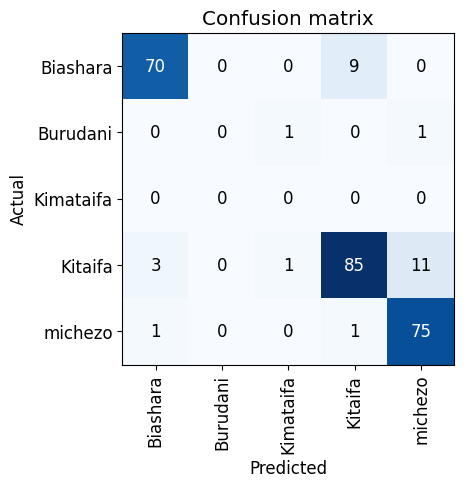

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [32]:
interp.print_classification_report()

              precision    recall  f1-score   support

    Biashara       0.95      0.89      0.92        79
    Burudani       0.00      0.00      0.00         2
   Kimataifa       0.00      0.00      0.00         0
     Kitaifa       0.89      0.85      0.87       100
     michezo       0.86      0.97      0.91        77

    accuracy                           0.89       258
   macro avg       0.54      0.54      0.54       258
weighted avg       0.89      0.89      0.89       258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [33]:
learn.predict(test.loc[2,'content_cleaned'])


('Biashara',
 tensor(0),
 tensor([8.6254e-01, 2.8658e-03, 4.4648e-03, 1.3010e-01, 2.8706e-05]))

In [34]:
pred = []
for i in range(len(test)):
  pred.append(learn.predict(test.loc[i,'content_cleaned'])[2])

In [35]:
sub = pd.DataFrame(torch.stack(pred, dim=0),
             columns=["biashara","burudani","kimataifa","kitaifa","michezo"]
             )
sub["swahili_id"] = test["swahili_id"]
sub[["swahili_id","kitaifa","michezo","biashara","kimataifa","burudani"]].to_csv("submission1.csv",index=False)

Pushing back to Git

In [36]:
!git config --global user.email "oluyoyin2000@gmail.com"
!git config --global user.name "Timmecom"


In [37]:
!git add .

In [38]:
!git commit -m "Colab-run updates"

Streaming output truncated to the last 5000 lines.
 create mode 100644 train_classes/Biashara/SW163.txt
 create mode 100644 train_classes/Biashara/SW1634.txt
 create mode 100644 train_classes/Biashara/SW1638.txt
 create mode 100644 train_classes/Biashara/SW1648.txt
 create mode 100644 train_classes/Biashara/SW1649.txt
 create mode 100644 train_classes/Biashara/SW1656.txt
 create mode 100644 train_classes/Biashara/SW1658.txt
 create mode 100644 train_classes/Biashara/SW1661.txt
 create mode 100644 train_classes/Biashara/SW1662.txt
 create mode 100644 train_classes/Biashara/SW1667.txt
 create mode 100644 train_classes/Biashara/SW1668.txt
 create mode 100644 train_classes/Biashara/SW1672.txt
 create mode 100644 train_classes/Biashara/SW1675.txt
 create mode 100644 train_classes/Biashara/SW1680.txt
 create mode 100644 train_classes/Biashara/SW1686.txt
 create mode 100644 train_classes/Biashara/SW1687.txt
 create mode 100644 train_classes/Biashara/SW1691.txt
 create mode 100644 train_classe

In [42]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
